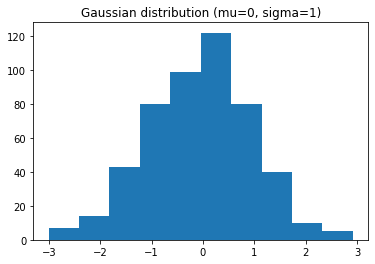

In [2]:
from random import gauss
import matplotlib.pyplot as plt
%matplotlib inline

l = [gauss(0, 1) for _ in range(500)]
plt.hist(l)
plt.title('Gaussian distribution (mu=0, sigma=1)')
plt.show()

In [9]:
!wget https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/GLT_filtered.csv -O glt.csv

--2022-04-08 22:25:22--  https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/GLT_filtered.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12720645 (12M) [text/plain]
Saving to: ‘glt.csv’

glt.csv             100%[===================>]  12,13M  38,8MB/s    in 0,3s    

2022-04-08 22:25:22 (38,8 MB/s) - ‘glt.csv’ saved [12720645/12720645]



In [89]:
import csv
import numpy as np

with open("glt.csv", "r") as f:
    lol = []
    for cols in csv.reader(f):
        lol.append(cols)
    lol = np.array(lol)
        

In [64]:
avg_temp = np.array(lol)[:, 1]
avg_temp[1:]

array(['26.704', '27.434', '', ..., '12.399', '4.7360000000000015',
       '-0.8220000000000001'], dtype='<U34')

In [90]:
def str_to_float(l:list) -> list:
    """Return the same list but with float values

    Args:
        l (list): input list of str values

    Returns:
        list: output list filled with None and floats
    """
    return [None if i == '' else float(i) for i in l]

def pick_forward_value(li:list, index:int=0) -> float:
    for i in range(index + 1, len(li)):
        if li[i] == None:
            continue
        else:
            return float(li[i])

def pick_backward_value(li:list, index:int=-1) -> float:        
    for i in range(index - 1 , 0 - 1, -1):
        if li[i] == None:
            continue
        else:
            return float(li[i])
    return None

import copy

def fill_list(original_list:list) -> list:
    # Transform the list if it has strings instead of floats
    original_list = str_to_float(original_list)
    
    # Make a copy that we will fill
    newl = copy.deepcopy(original_list)
    
    # Subsitute values
    for i in range(len(original_list)):
        #### initial value ####
        if (i == 0):  
            if (original_list[i] == None): 
                val1 = pick_forward_value(original_list, i)
                val = val1/2
                newl[i] = val
            else:
                val = original_list[i]
                continue
        #### last value ####
        elif (i == len(original_list)-1):
            if original_list[i] == None: 
                val1 = pick_backward_value(original_list, i)
                val = val1/2
                newl[i] = val
            else:
                newl[i] = original_list[i]
                continue
        #### inner values ####
        else:
            if original_list[i] == None:
                # Save in the val variable the last computed value
                # Hence we can use it without checking the list
                val1 = pick_forward_value(original_list, i)
                if val1 == None:
                    val = (val + val)/2
                else:
                    val = (val + val1)/2
                newl[i] = val
            else:
                continue
    return newl

In [91]:
# To take every city we can exploit the set function 
# (it doesn't take care of the order)
cities = list(set(lol[1:,3])) 
# Since the cities are sorted alphabetically,
# we have used the set function and then sorted
# the outcoming list
cities.sort() # sort alphabetically in place

d = dict()
# Fill the dictionary with keys as the name of city
# and as values a tuple containing the range of indexes
for city in cities:
    index = 0
    indexes = list()
    for row in lol[1:,3]:
        if row == city:    
            indexes.append(index)
            index += 1
        else: 
            index += 1
    d[city] = min(indexes), max(indexes)

In [93]:
for city in cities:
    tp = d[city] # tuple containing the range of indexes
    start_index = tp[0] + 1 # + 1 to take into account the header
    stop_index = tp[1] + 2 # + 1 for the header, the other + 1 is due to the fact that the slice doesn't include the stop index 
    # Fill the temperature and then set them
    temp_filled = fill_list(lol[tp[0]+1:tp[1]+2][:,1])
    lol[tp[0]+1:tp[1]+2][:,1] = temp_filled
    # Do the same for the standard deviation
    std_filled = fill_list(lol[tp[0]+1:tp[1]+2][:,2])
    lol[tp[0]+1:tp[1]+2][:,2] = std_filled


In [94]:
df = pd.DataFrame(lol[1:], columns=lol[0])

In [95]:
df.info() # to check if everything is filled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219575 entries, 0 to 219574
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Date                           219575 non-null  object
 1   AverageTemperature             219575 non-null  object
 2   AverageTemperatureUncertainty  219575 non-null  object
 3   City                           219575 non-null  object
 4   Country                        219575 non-null  object
 5   Latitude                       219575 non-null  object
 6   Longitude                      219575 non-null  object
dtypes: object(7)
memory usage: 11.7+ MB


In [111]:
import pandas as pd
from typing import Tuple

def get_topN_temp(df = pd.DataFrame, city_name:str=None, N:int=0) -> Tuple:
    mask = df['City'] == city_name
    # Pick the last N values in the sorted list in ascendent order,
    # then change the order
    hot = sorted(df[mask]['AverageTemperature'])[-N:][::-1]
    # Pick the first N values in the sorted list in ascendent order
    cold = sorted(df[mask]['AverageTemperature'])[:N]
    return hot, cold


In [112]:
get_topN_temp(df, cities[0], N=10)

(['29.923',
  '29.596',
  '29.477',
  '29.471',
  '29.405',
  '29.345',
  '29.288',
  '29.278',
  '29.262',
  '29.246'],
 ['22.363000000000003',
  '22.377',
  '22.528',
  '22.63000000000001',
  '22.644',
  '22.682',
  '22.728',
  '22.75',
  '22.819000000000006',
  '22.912'])

In [10]:
cities = df['City'].unique()
for city in cities:
    print(city, (df['City'] == city).sum())

Abidjan 1968
Addis Abeba 1956
Ahmadabad 2352
Aleppo 2352
Alexandria 2352
Ankara 2352
Baghdad 2328
Bangalore 2352
Bangkok 2352
Belo Horizonte 2172
Berlin 2352
Bogotá 2268
Bombay 2352
Brasília 2172
Cairo 2352
Calcutta 2352
Cali 2256
Cape Town 1872
Casablanca 2352
Changchun 2309
Chengdu 2309
Chicago 2352
Chongqing 2076
Dakar 1968
Dalian 2204
Dar Es Salaam 1956
Delhi 2352
Dhaka 2352
Durban 1872
Faisalabad 2352
Fortaleza 2016
Gizeh 2352
Guangzhou 2076
Harare 1956
Harbin 2309
Ho Chi Minh City 2256
Hyderabad 2352
Ibadan 1884
Istanbul 2352
Izmir 2352
Jaipur 2352
Jakarta 2256
Jiddah 2040
Jinan 2076
Kabul 2160
Kano 1884
Kanpur 2352
Karachi 2352
Kiev 2352
Kinshasa 1884
Lagos 1968
Lahore 2352
Lakhnau 2352
Lima 1582
London 2352
Los Angeles 1968
Luanda 1884
Madras 2352
Madrid 2352
Manila 2016
Mashhad 2172
Melbourne 2064
Mexico 2136
Mogadishu 1956
Montreal 2352
Moscow 2352
Nagoya 2061
Nagpur 2352
Nairobi 1956
Nanjing 2064
New Delhi 2352
New York 2352
Paris 2352
Peking 2309
Pune 2352
Rangoon 2352
Rio 